Unit 6 | Assignment - What's the Weather Like?
Background
Whether financial, political, or social -- data's true power lies in its ability to answer 
questions definitively. So let's take what you've learned about Python requests, APIs, and JSON
traversals to answer a fundamental question: "What's the weather like as we approach the equator?"
    
Now, we know what you may be thinking: "Duh. It gets hotter..."
    
But, if pressed, how would you prove it?

Equator

WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities 
across the world of varying distance from the equator. To accomplish this, you'll be utilizing 
a simple Python library, the OpenWeatherMap API, and a little common sense to create a 
representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:
    
    √Temperature (F) vs. Latitude
    √Humidity (%) vs. Latitude
    √Cloudiness (%) vs. Latitude
    √Wind Speed (mph) vs. Latitude

Your final notebook must:
    √ Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

    √ Perform a weather check on each of the cities using a series of successive API calls.

    √Include a print log of each city as it's being processed with the city number, city name, and 
        requested URL.

Save both a CSV of:
    √ all data retrieved and 
    √ png images for each scatter plot.

As final considerations:
    √ You must use the Matplotlib and Seaborn libraries.
    √ You must include a written description of three observable trends based on the data.
    √ You must use proper labeling of your plots, including aspects like: Plot Titles 
        (with date of analysis) and Axes Labels.
        
You must include an exported markdown version of your Notebook called  README.md in your GitHub 
repository.

See Example Solution for a reference on expected format.

Hints and Considerations

You may want to start this assignment by refreshing yourself on 4th grade geography, in 
particular, the geographic coordinate system.

Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial
study, you should be able to answer basic questions about the API: 
    Where do you request the APIkey? 
    Which Weather API in particular will you need? 
    What URL endpoints does it expect? 
    What JSON structure does it respond with? 
    Before you write a line of code, you should be aiming to have a crystal clear understanding
    of your intended outcome.
    
Though we've never worked with the citipy Python library, push yourself to decipher how it 
works,and why it might be relevant. Before you try to incorporate the library into your 
analysis, start by creating simple test cases outside your main script to confirm that you are 
using it correctly. Too often, when introduced to a new library, students get bogged down by the
most minor of errors -- spending hours investigating their entire code -- when, in fact, a 
simple and focused test would have shown their basic utilization of the library was wrong from 
the start. Don't let this be you!

Part of our expectation in this challenge is that you will use critical thinking skills to 
understand how and why we're recommending the tools we are. 
    What is Citipy for? 
    Why would you use it in conjunction with the OpenWeatherMap API? 
    How would you do so?
    
In building your script, pay attention to the cities you are using in your query pool. 
Are you getting coverage of the full gamut of latitudes and longitudes? 
Or are you simply choosing 500 cities concentrated in one region of the world? 
Even if you were a geographic genius, simply rattling 500 cities based on your human selection 
would create a biased dataset. Be thinking of how you should counter this. 
(Hint: Consider the full range of latitudes).
Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, 
then you can safely say that you've gained a strong mastery of the core foundations of data 
analytics and it will only go better from here. Good luck!

#Note: I downloaded and installed citipy, but could not get the function to work.  So, I used the 
raw data from citipy and created my own random city selection.

#OBSERVATIONS:
1 - There is a clear picture of a correspondence between Temperature and Latitude.  Evidenced by the ScatterPlot of
        Temperature v. Latitute.  As progress is made towards the Equator, the Temperature rises and the trend appears 
        to repeat itself as we progress towards the South Pole.
2 -  % Humidity seems to want to follow a similar trend as evidenced by the Scatter Plot of humidity v. Latitute. 
            This observation is made given that while the plot reflects numerous points of data, that data tends to 
            accumulate or group together more towards the higher humidity area (note red color on Seaborn scatter
            plot)
3 - The other Scatter Plots do not lend themselves to forcasting a trend.  The data may be skewed upon the time of
        observation, which may be further skewed based upon season (tilt of the earth) or other major weather issues.
4 - Time of day also plays a part in the outcome with the excdeption of max Temp.  Throughout the various queries, the 
    data would appear to change based upon early morning vs. late evening (with the exception of the basic curve
    structure of Max temperature vs. Latitude.

In [1]:
import csv
import random
import pandas as pd
import numpy as np
import json
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import time
import datetime
from datetime import date

In [2]:
# Save config information
api_key = "555f071860e562f7871e3f299ddd26ba"
url1 = "http://api.openweathermap.org/data/2.5/weather?"
city_path="../Homework6/Resources/worldcities.csv"
units="imperial"



In [3]:
#print(url1)

In [4]:
#Partial query
#ran_url= url1+ "appid=" +api_key +"&units=" + units
#ran_url used as basis for trying to retrieve data via latitude and longitude
ran_url2=url1+ "appid=" +api_key +"&units=" + units +"&q="

In [5]:
#print(ran_url2)

In [6]:
cities_check=pd.read_csv(city_path,encoding="utf=8")

#cities_check.keys()


In [7]:
#cities_check.head()

In [8]:
#Random city call
cc=cities_check.iloc[28795,:]
#cc.head()

In [9]:
#Random city call
#checking latitude data
cc=cities_check.iloc[40000,:]
#cc.head()

In [10]:
#Testing recognition of a single city name (capitalized)
tester3=req.get(ran_url2 + "Baltimore").json()
#tester3

In [11]:
#Testing city and country seperated by a comma (lower case)
tester2=req.get(ran_url2 + "mabilo,ph").json()
#tester2

In [12]:
#Testing recognigtion of a city (lower case) where the city name is more than one work, e.g., Los Angeles, New York
tester4=req.get(ran_url2 +"andorra la vella").json()
#tester4

In [13]:
#Looking for cities that might have empty rows
cities_batch=cities_check.count()
#cities_batch

In [14]:
#Removing cities with empty rows
cities_batch=cities_check.dropna(how="any")
#cities_batch.count()

#experimenting with calling cities by latitute and longitude - Not successful yet.
ran_city_weather=[]
request_cc_weather=req.get(ran_url + lat=11.6784&lon=122.408).json()
ran_city_weather.append(request_cc_weather)
#ran_city_weather

In [16]:
#Main code for looping and pulling information for 500 random cities, storing the country index and dats 
#   within a list "sum_ran_city"
#Apparently I could have used random.choice instead of selecting a random index (quicker?)
count1=1
ran_city=[]
ran_city_weather=[]
ran_city_time=[]
sum_ran_city=[]
record_process=[]
print("Beginning Data Retrieval")
print("------------------------")
for i in range(550):
    x=random.randint(0,len(cities_batch))
    #print(x)
    #print(cities_batch.iloc[x,:])
    #print(cities_check.iloc[x,:])
    ran_city=(cities_batch.iloc[x,:])
    sum_ran_city.append(ran_city)
    ran_name=ran_city["City"]
    ran_country=ran_city["Country"]
    print("Processing Record "+ str(i) + "|" + ran_name)
    print(ran_url2 + ran_name +","+ran_country)
    record_process.append("Processing Record "+ str(i) + "|" + ran_name)
    record_process.append(ran_url2 + ran_name +","+ran_country)
    result_of_query=req.get(ran_url2 + ran_name +","+ran_country).json()
    val=result_of_query["dt"]
    daytime_info=datetime.datetime.fromtimestamp(int(val)).strftime('%Y-%m-%d %H:%M:%S %p')
    result_of_query["dt"]=daytime_info
    ran_city_weather.append(result_of_query)

Beginning Data Retrieval
------------------------
Processing Record 0|nabari
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=nabari,jp
Processing Record 1|volya
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=volya,ru
Processing Record 2|eregli
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=eregli,tr
Processing Record 3|carlogani
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=carlogani,ro
Processing Record 4|rome
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=rome,us
Processing Record 5|otradnoye
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=otradnoye,ru
Processing Record 6|lodja
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299

Processing Record 58|cossato
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=cossato,it
Processing Record 59|manay
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=manay,ph
Processing Record 60|notre-dame-de-gravenchon
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=notre-dame-de-gravenchon,fr
Processing Record 61|palmeiras de goias
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=palmeiras de goias,br
Processing Record 62|jalu
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=jalu,ly
Processing Record 63|grosbous
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=grosbous,lu
Processing Record 64|sinayawan
http://api.openweathermap.org/data/2.5/weather?appid=555f071860

Processing Record 114|czersk
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=czersk,pl
Processing Record 115|pensilvania
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=pensilvania,co
Processing Record 116|nuevo colon
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=nuevo colon,co
Processing Record 117|lipin bor
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=lipin bor,ru
Processing Record 118|east haven
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=east haven,us
Processing Record 119|tsukuba
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=tsukuba,jp
Processing Record 120|balete
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26

Processing Record 170|wijnegem
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=wijnegem,be
Processing Record 171|el paraiso
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=el paraiso,hn
Processing Record 172|poco branco
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=poco branco,br
Processing Record 173|east moline
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=east moline,us
Processing Record 174|tandayag
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=tandayag,ph
Processing Record 175|krithia
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=krithia,gr
Processing Record 176|quatre bornes
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3

Processing Record 226|aiquile
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=aiquile,bo
Processing Record 227|polikhni
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=polikhni,gr
Processing Record 228|maluay
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=maluay,ph
Processing Record 229|pula
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=pula,hr
Processing Record 230|ausa
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=ausa,in
Processing Record 231|malicboy
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=malicboy,ph
Processing Record 232|jambol
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=jambol,bg
Proc

Processing Record 283|la gomera
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=la gomera,gt
Processing Record 284|bohodukhiv
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=bohodukhiv,ua
Processing Record 285|myski
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=myski,ru
Processing Record 286|godfrey
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=godfrey,us
Processing Record 287|bucovat
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=bucovat,ro
Processing Record 288|rjukan
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=rjukan,no
Processing Record 289|targsorul-vechi
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=im

Processing Record 339|godella
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=godella,es
Processing Record 340|ulundi
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=ulundi,za
Processing Record 341|morgantown
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=morgantown,us
Processing Record 342|fizesu gherlii
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=fizesu gherlii,ro
Processing Record 343|cheran
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=cheran,mx
Processing Record 344|putol
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=putol,ph
Processing Record 345|kemin
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=impe

Processing Record 397|gomez palacio
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=gomez palacio,mx
Processing Record 398|miyang
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=miyang,cn
Processing Record 399|shaturtorf
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=shaturtorf,ru
Processing Record 400|himare
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=himare,al
Processing Record 401|talusan
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=talusan,ph
Processing Record 402|oberwil
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=oberwil,ch
Processing Record 403|tralee
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=i

Processing Record 454|sassari
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=sassari,it
Processing Record 455|pajacuaran
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=pajacuaran,mx
Processing Record 456|aga
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=aga,ph
Processing Record 457|campbell river
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=campbell river,ca
Processing Record 458|binubusan
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=binubusan,ph
Processing Record 459|stupari
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=stupari,ba
Processing Record 460|karymskoye
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&u

Processing Record 511|ayios nikolaos
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=ayios nikolaos,gr
Processing Record 512|kipalbig
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=kipalbig,ph
Processing Record 513|santa ana
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=santa ana,mx
Processing Record 514|charleston
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=charleston,us
Processing Record 515|podstepki
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=podstepki,ru
Processing Record 516|vasvar
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f299ddd26ba&units=imperial&q=vasvar,hu
Processing Record 517|lagodekhi
http://api.openweathermap.org/data/2.5/weather?appid=555f071860e562f7871e3f2

In [17]:
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
record_process.append("-----------------------")
record_process.append("Data Retrieval Complete")
record_process.append("-----------------------")

-----------------------
Data Retrieval Complete
-----------------------


In [19]:
#print(json.dumps(result_of_query,indent=4))

#test area for converting datetime information and restoring back into results
val=result_of_query["dt"]
daytime_info=datetime.datetime.fromtimestamp(int(val)).strftime('%Y-%m-%d %H:%M:%S %p')
daytime

In [20]:
rcw=pd.DataFrame(ran_city_weather)
#rcw.head()

In [21]:
src=pd.DataFrame(sum_ran_city)
#src.head()

In [22]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude
lat_info=[info.get("coord").get("lat") for info in ran_city_weather]
lon_info=[info.get("coord").get("lon") for info in ran_city_weather]
temp_info=[info.get("main").get("temp_max") for info in ran_city_weather]
hum_info=[info.get("main").get("humidity") for info in ran_city_weather]
cloud_info=[info.get("clouds").get("all") for info in ran_city_weather]
wind_info=[info.get("wind").get("speed") for info in ran_city_weather]
city_info=[info.get("name") for info in ran_city_weather]
country_info=[info.get("sys").get("country") for info in ran_city_weather]
date_info=[info.get("dt") for info in ran_city_weather]


In [23]:
c_data={"City":city_info,"Cloudiness":cloud_info,"Country":country_info,"Date / Time":date_info,"Humidity":hum_info,"Lat":lat_info,"Lon":lon_info,"Max Temp":temp_info,"Wind Speed":wind_info}
city_data=pd.DataFrame(c_data)
city_data.head()

,City,Cloudiness,Country,Date / Time,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Nabari,75,JP,2017-10-29 17:16:00 PM,58,34.62,136.08,55.40,21.92
1,Volya,0,RU,2017-10-29 17:30:00 PM,81,51.77,39.54,42.80,8.95
2,Eregli,20,TR,2017-10-29 18:22:06 PM,97,37.51,34.05,46.11,1.83
3,Carlogani,0,RO,2017-10-29 18:00:00 PM,66,44.52,24.15,48.20,18.34
4,Rome,20,US,2017-10-29 17:55:00 PM,52,34.26,-85.16,46.40,8.05


In [24]:
city_data.to_csv("City Summary.csv",index=False, header=True)

In [25]:
temp_lat={"temperature (F)":temp_info,"Latitude":lat_info}
temp_lat=pd.DataFrame(temp_lat)
#temp_lat.head()


In [26]:
today=date.today()
today.strftime("%A,%d,%B %Y")

#today

'Sunday,29,October 2017'

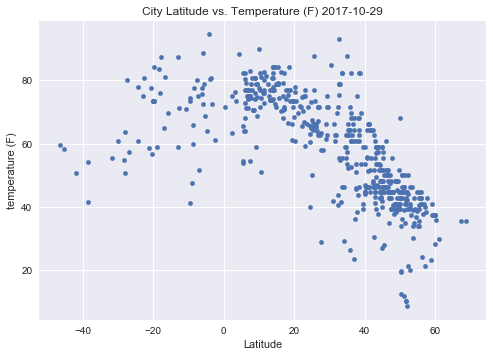

In [27]:
temp_lat.plot(kind="scatter",x="Latitude",y="temperature (F)",grid=True,title="City Latitude vs. Temperature (F) "+str(today))
plt.xlabel=("Latitude")
plt.ylabel=("City Temperature (F)")
plt.savefig("City_Latitude_v_Temp_Matplot.png")
plt.show()

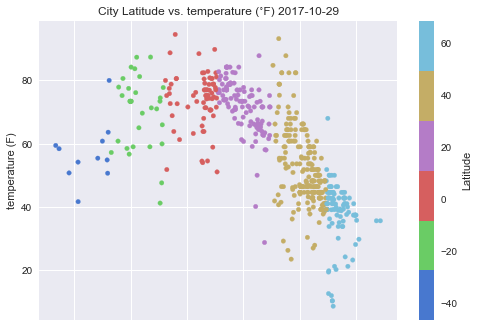

In [28]:
current_palette=sns.color_palette("muted",n_colors=6)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())
temp_lat.plot(kind="scatter",x="Latitude",y="temperature (F)",grid=True,title="City Latitude vs. temperature (˚F) "+str(today),c=0,cmap=cmap)
plt.xlabel=("Latitude")
plt.ylabel=("temperature (˚F)")
plt.savefig("City_Latitude_v_Temp_Seaborn.png")
plt.show()

In [29]:
#temp_lat.dtypes

In [30]:
hum_lat={"Humidity":hum_info,"Latitude":lat_info}
hum_lat=pd.DataFrame(hum_lat)
#hum_lat.head()

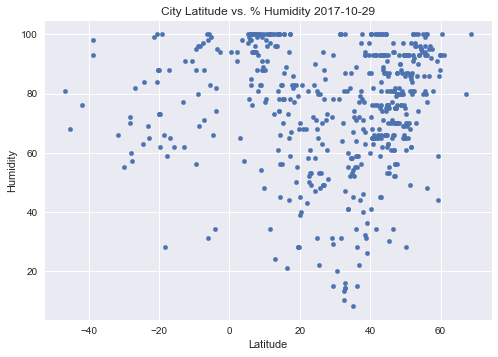

In [31]:
hum_lat.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,title="City Latitude vs. % Humidity "+str(today))
plt.xlabel=("Latitude")
plt.ylabel=("Humidity %")
plt.savefig("City_Latitude_v_Humidity_Matplot.png")
plt.show()

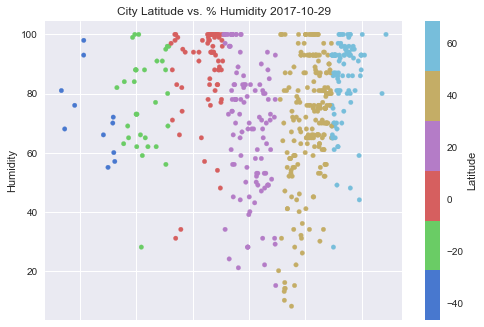

In [32]:
current_palette=sns.color_palette("muted",n_colors=6)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())
hum_lat.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,title="City Latitude vs. % Humidity "+str(today),c=1,cmap=cmap)
plt.xlabel=("Latitude")
plt.ylabel=("% Humidity")
plt.savefig("City_Latitude_v_Humidity_Seaborn.png")
plt.show()

In [33]:
cloud_lat={"% Cloudiness":cloud_info,"Latitude":lat_info}
cloud_lat=pd.DataFrame(cloud_lat)
#cloud_lat.head()

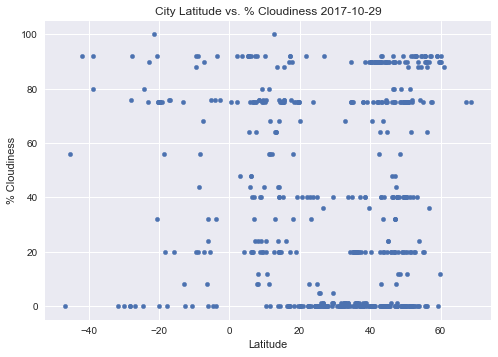

In [34]:
cloud_lat.plot(kind="scatter",x="Latitude",y="% Cloudiness",grid=True,title="City Latitude vs. % Cloudiness "+str(today))
plt.xlabel=("Latitude")
plt.ylabel=("% Cloudiness")
plt.savefig("City_Latitude_v_%Cloudiness_Matplot.png")
plt.show()

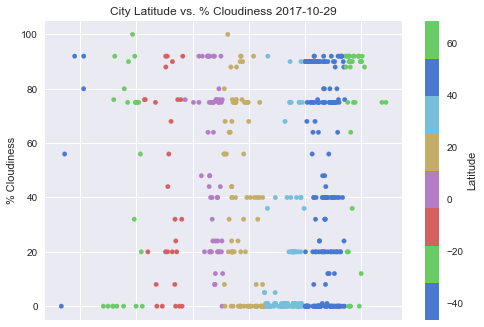

In [35]:
current_palette=sns.color_palette("muted",n_colors=8)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())
cloud_lat.plot(kind="scatter",x="Latitude",y="% Cloudiness",grid=True,title="City Latitude vs. % Cloudiness "+str(today),c=1,cmap=cmap)
plt.xlabel=("Latitude")
plt.ylabel=("% Cloudiness")
plt.savefig("City_Latitude_v_%Cloudiness_Seaborn.png")
plt.show()

In [36]:
wind_lat={"Wind_Speed_(mph)":wind_info,"Latitude":lat_info}
wind_lat=pd.DataFrame(wind_lat)
wind_lat.to_csv("Wind_v_Lat.csv",index=False,header=True)
#wind_lat.head()

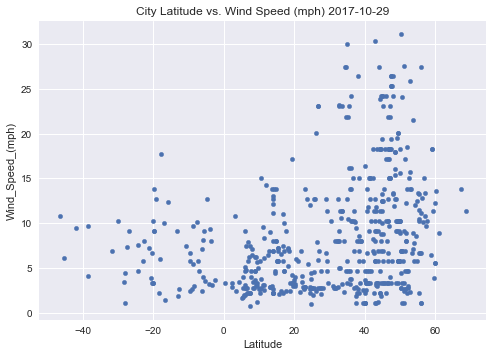

In [37]:
wind_lat.plot(kind="scatter",x="Latitude",y="Wind_Speed_(mph)",grid=True,title="City Latitude vs. Wind Speed (mph) "+str(today))
plt.xlabel=("Latitude")
plt.ylabel=("Wind Speed (mph)")
plt.savefig("City_Latitude_v_WindSpeed_Matplot.png")
plt.show()

In [38]:
#ran_city_weather

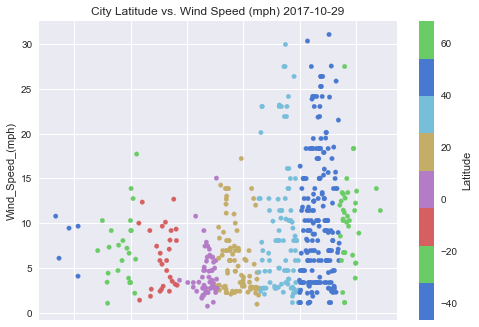

In [39]:
current_palette=sns.color_palette("muted",n_colors=8)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())
wind_lat.plot(kind="scatter",x="Latitude",y="Wind_Speed_(mph)",grid=True,title="City Latitude vs. Wind Speed (mph) "+str(today),c=0,cmap=cmap)
plt.xlabel=("Latitude")
plt.ylabel=("Wind Speed (mph)")
plt.savefig("City_Latitude_v_Wind_Speed_Seaborn.png")
plt.show()